In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
data = pd.read_csv('Titanic_data/train.csv')

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Гипотеза 1:

#### Преимущественно выживают люди, купившие более дорогие билеты

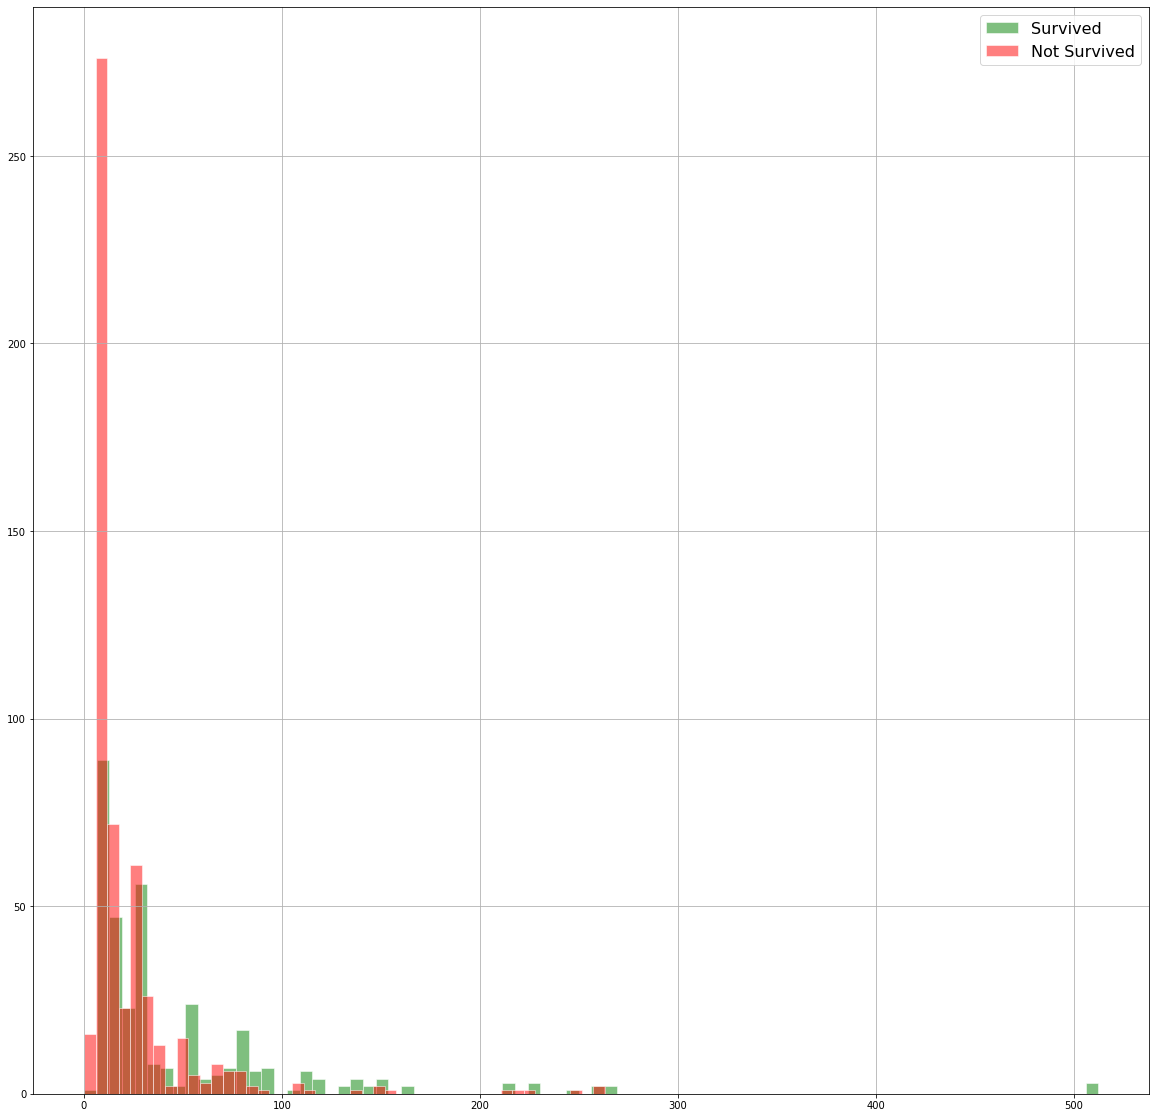

In [138]:
data[data['Survived'] == 1]['Fare'].hist(figsize = (20, 20), bins = 80, edgecolor = 'white', color = 'green', grid = True, alpha = 0.5)
data[data['Survived'] == 0]['Fare'].hist(figsize = (20, 20), bins = 45, edgecolor = 'white', color = 'red', grid = True, alpha = 0.5).legend(['Survived','Not Survived'], prop={'size':16})


#### Вывод: гипотеза верна

## Гипотеза 2:

#### Чем выше класс обслуживания пассажиров, тем отношение female/male выше

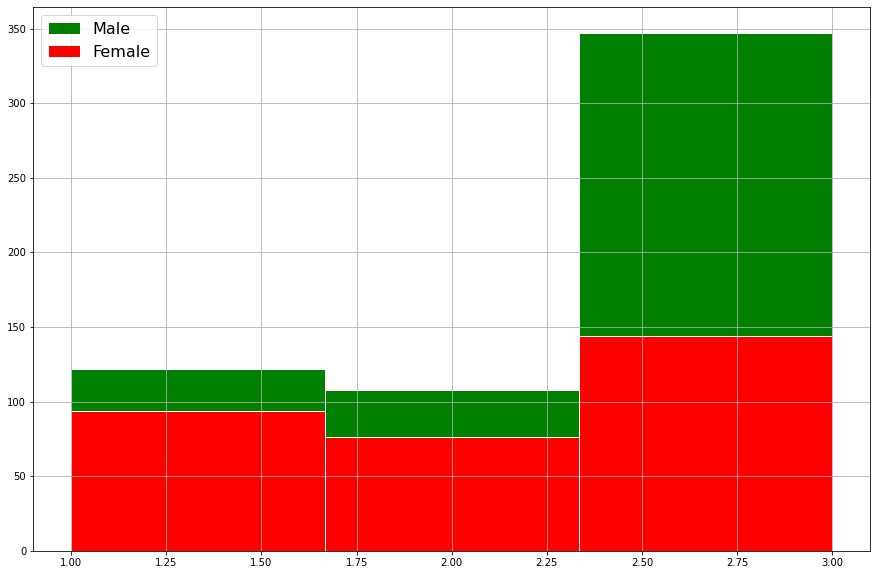

In [78]:
data[data['Sex'] == 'male']['Pclass'].hist(figsize = (15, 10), bins = 3, edgecolor = 'white', color = 'green', grid = True)
data[data['Sex'] == 'female']['Pclass'].hist(figsize = (15, 10), bins = 3, edgecolor = 'white', color = 'red', grid = True).legend(['Male','Female'], prop={'size':16})


#### Вывод: гипотеза верна

## Гипотеза 3:

#### Чем благополучнее класс, тем выше стоимость билета

<AxesSubplot:xlabel='Pclass'>

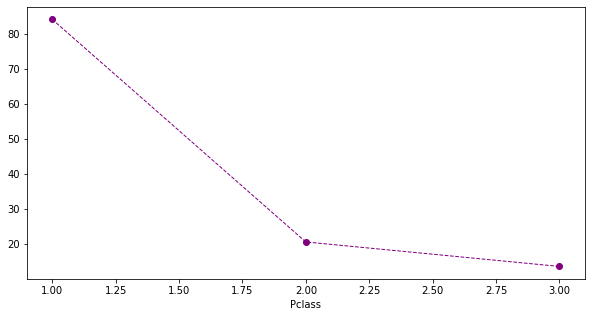

In [140]:
data.groupby(['Pclass']) ['Fare'].mean().plot(figsize=(10, 5), linestyle='--', marker='o', lw=1, color='purple')

#### Вывод: гипотеза верна 

## Гипотеза 4:

#### Чем старше человек, тем больше родственников

<AxesSubplot:xlabel='Age'>

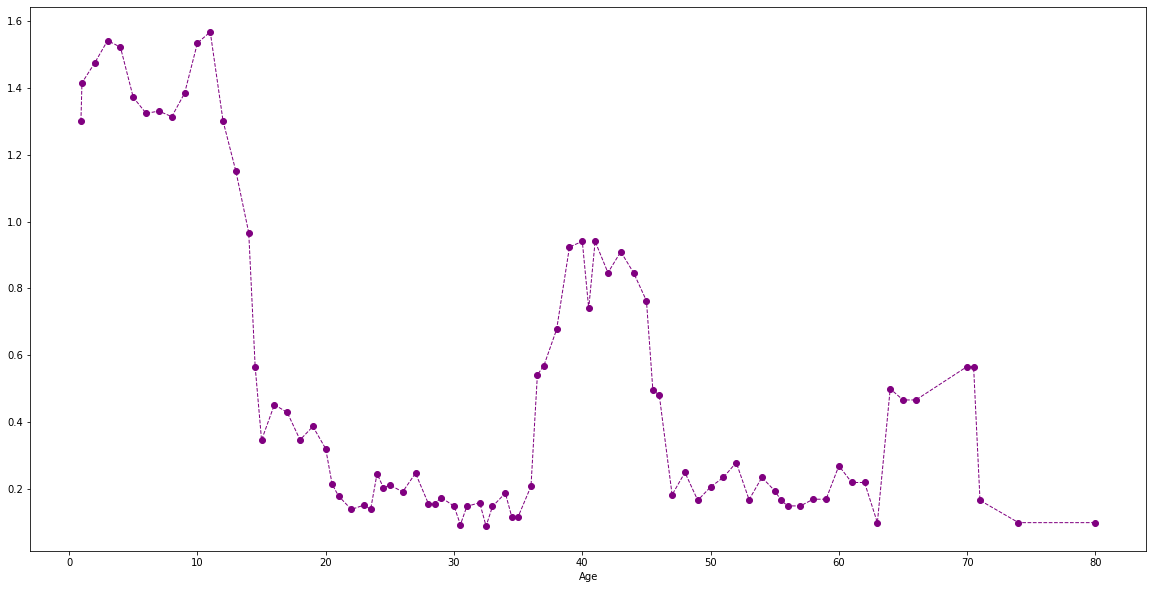

In [145]:
data.groupby(['Age']) ['Parch'].mean().rolling(5).mean().plot(figsize=(20, 10), linestyle='--', marker='o', lw=1, color='purple')

#### Вывод: гипотеза неверна, т.к. с детьми ехало больше всего родственников 

## Гипотеза 5:

#### В портах, где на борт Титаника поднималось большое количество женщин, поднималось большое количество мужчин, т.е. отношение female/male практически не изменялось

<AxesSubplot:>

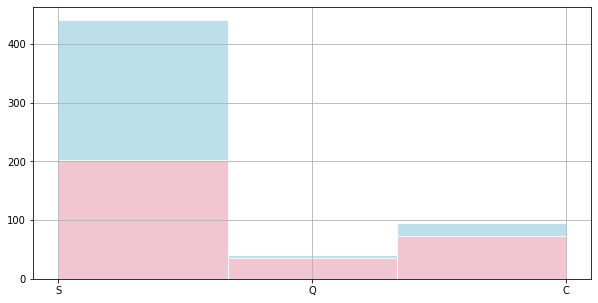

In [164]:
data[data['Sex']=='male']['Embarked'].hist(figsize = (10, 5), bins = 3, edgecolor = 'white', color = 'lightblue', grid = True, alpha=0.8)
data[data['Sex']=='female']['Embarked'].hist(figsize = (10, 5), bins = 3, edgecolor = 'white', color = 'pink', grid = True, alpha=0.8)


#### Вывод: гипотеза неверна, т.к. в порту S на борт Титаника поднялось сильно большее число мужчин